<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with Keras

_Authors: Justin Pounders (ATL) and Riley Dallas (ATX)_

---


### Learning Objectives

- Describe the basic `keras` workflow.
- Train regression and classification neural networks using `keras`

In [1]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


# Regression
---

`make_regression` is an excellent library for generating a random regression problem. This helps us focus on the model without having to worry about the dataset. 

In the cell below, use `make_regression` to generate 10,000 samples using 20 features.

In [13]:
X, y = make_regression(n_samples=10000, n_features=20, random_state=42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [15]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Your first Neural Network!!
---

Next stop, [The Singularity](https://en.wikipedia.org/wiki/Technological_singularity)!

Creating a model in `keras` entails a few steps:
1. Create your network topology
2. Compile your model
3. Fit your model

We'll cover each step in the cells below.

### Create your network topology
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* regression problems, your output layer will be 1 neuron with *no* activation function. 

In [16]:
model = Sequential()
model.add(Dense(32, input_shape=(20,), activation='relu'))
model.add(Dense(1))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What [loss function](https://keras.io/losses/) to use (depends on if it's regression, classification, etc)
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=512)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 0s 13us/step - loss: 40176.7311 - mae: 160.4885 - val_loss: 39362.2386 - val_mae: 158.8472
Epoch 2/10
7500/7500 [==============================] - 0s 3us/step - loss: 40105.6114 - mae: 160.3461 - val_loss: 39291.4135 - val_mae: 158.7048
Epoch 3/10
7500/7500 [==============================] - 0s 4us/step - loss: 40031.1287 - mae: 160.1971 - val_loss: 39213.8832 - val_mae: 158.5487
Epoch 4/10
7500/7500 [==============================] - 0s 3us/step - loss: 39949.2477 - mae: 160.0318 - val_loss: 39126.1679 - val_mae: 158.3722
Epoch 5/10
7500/7500 [==============================] - 0s 3us/step - loss: 39854.6306 - mae: 159.8406 - val_loss: 39025.3855 - val_mae: 158.1685
Epoch 6/10
7500/7500 [==============================] - 0s 4us/step - loss: 39744.9483 - mae: 159.6186 - val_loss: 38907.5630 - val_mae: 157.9299
Epoch 7/10
7500/7500 [==============================] - 0s 3us/step - loss:

### Model predictions
---

Your `keras` model has a `.fit()` method, similar to `sklearn`. The only difference is `keras` returns a 2D `numpy` matrix (`sklearn` returns a 1D `numpy` array).

Try it out in the cell below.

In [19]:
model.predict(X_test)

array([[ 5.071074 ],
       [ 5.05025  ],
       [ 6.732931 ],
       ...,
       [ 6.099811 ],
       [ 5.9721107],
       [-2.434449 ]], dtype=float32)

# Binary Classification
---

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

In the cell below, use `make_classification` to generate 10,000 samples using 20 features.

In [25]:
X, y = make_classification(n_samples=10000, n_features=20, random_state=42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [27]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Network Topology for Binary Classification
---

We'll create a simple network with:
- an input layer, 
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* binary classification problems, your output layer will be 1 neuron with `'sigmoid'` activation function. Sigmoid squashes the output of our neuron to a value between 0 and 1, which is great for predicting probabilities. We'll use the probability for our loss function in the next step.

In [28]:
model = Sequential()
model.add(Dense(32, input_shape=(20,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For binary classification, use `binary_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [ ]:
def my_func(y_pred, y_true):
    return

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

When you fit a model, `keras` returns a `History` object. We need that in the next step, but for now, just save it to a variable.

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=512, verbose=1)

Train on 7500 samples, validate on 2500 samples
Epoch 1/30
7500/7500 [==============================] - 0s 3us/step - loss: 0.2335 - accuracy: 0.9317 - val_loss: 0.2460 - val_accuracy: 0.9232
Epoch 2/30
7500/7500 [==============================] - 0s 5us/step - loss: 0.2330 - accuracy: 0.9321 - val_loss: 0.2458 - val_accuracy: 0.9236
Epoch 3/30
7500/7500 [==============================] - 0s 5us/step - loss: 0.2327 - accuracy: 0.9324 - val_loss: 0.2457 - val_accuracy: 0.9236
Epoch 4/30
7500/7500 [==============================] - 0s 4us/step - loss: 0.2323 - accuracy: 0.9333 - val_loss: 0.2457 - val_accuracy: 0.9244
Epoch 5/30
7500/7500 [==============================] - 0s 4us/step - loss: 0.2322 - accuracy: 0.9331 - val_loss: 0.2453 - val_accuracy: 0.9240
Epoch 6/30
7500/7500 [==============================] - 0s 4us/step - loss: 0.2318 - accuracy: 0.9332 - val_loss: 0.2452 - val_accuracy: 0.9252
Epoch 7/30
7500/7500 [==============================] - 0s 4us/step - loss: 0.2314 - acc

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

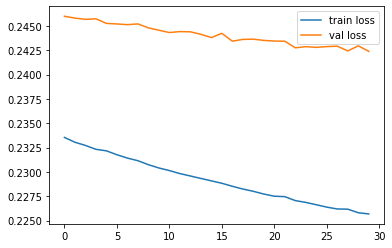

In [33]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

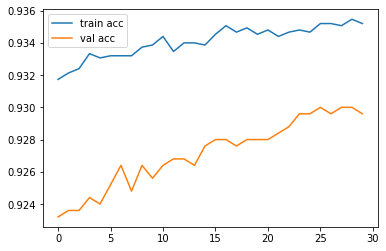

In [35]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

# Multi-class Classification
---

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [37]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=4, n_classes=3, random_state=42)

### One-hot Encoding Targets
---

In `keras`, you have to one-hot encode your `y` if it contains more than two classes. We'll use `keras`' built-in `to_categorical` function to achieve this.

In [38]:
y = to_categorical(y)
y[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### Train/Test Split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

Use an instance of `StandardScaler` to scale your `X_train` and `X_test` in the cell below.

In [40]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Network Topology for Multi-class Classification
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer

For *all* multi-class classification problems, your output layer will be the same number of neurons as the number of classes in your problem. The activation function will be `softmax`, which will normalize the predictions into probabilities that sum up to 1.0.

In [41]:
model = Sequential()
model.add(Dense(32, input_shape=(20,), activation='relu'))
model.add(Dense(3, activation='softmax'))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For multi-class classification, use `categorical_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [43]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=512, verbose=2)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
 - 0s - loss: 1.2668 - accuracy: 0.3321 - val_loss: 1.2031 - val_accuracy: 0.3328
Epoch 2/10
 - 0s - loss: 1.1522 - accuracy: 0.3659 - val_loss: 1.1078 - val_accuracy: 0.3744
Epoch 3/10
 - 0s - loss: 1.0710 - accuracy: 0.4208 - val_loss: 1.0394 - val_accuracy: 0.4396
Epoch 4/10
 - 0s - loss: 1.0105 - accuracy: 0.4803 - val_loss: 0.9860 - val_accuracy: 0.4984
Epoch 5/10
 - 0s - loss: 0.9618 - accuracy: 0.5325 - val_loss: 0.9416 - val_accuracy: 0.5560
Epoch 6/10
 - 0s - loss: 0.9204 - accuracy: 0.5785 - val_loss: 0.9032 - val_accuracy: 0.5896
Epoch 7/10
 - 0s - loss: 0.8840 - accuracy: 0.6131 - val_loss: 0.8691 - val_accuracy: 0.6232
Epoch 8/10
 - 0s - loss: 0.8518 - accuracy: 0.6336 - val_loss: 0.8385 - val_accuracy: 0.6444
Epoch 9/10
 - 0s - loss: 0.8226 - accuracy: 0.6493 - val_loss: 0.8112 - val_accuracy: 0.6580
Epoch 10/10
 - 0s - loss: 0.7963 - accuracy: 0.6656 - val_loss: 0.7865 - val_accuracy: 0.6628


### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

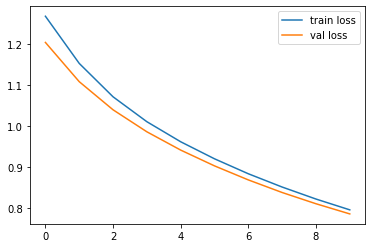

In [44]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

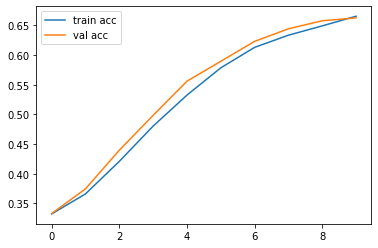

In [45]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()